Text(0, 0.5, 'Genres')

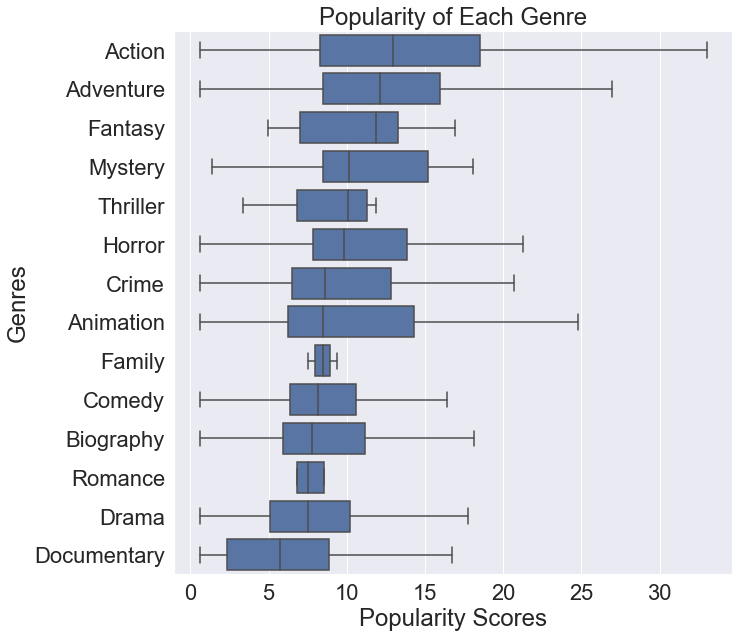

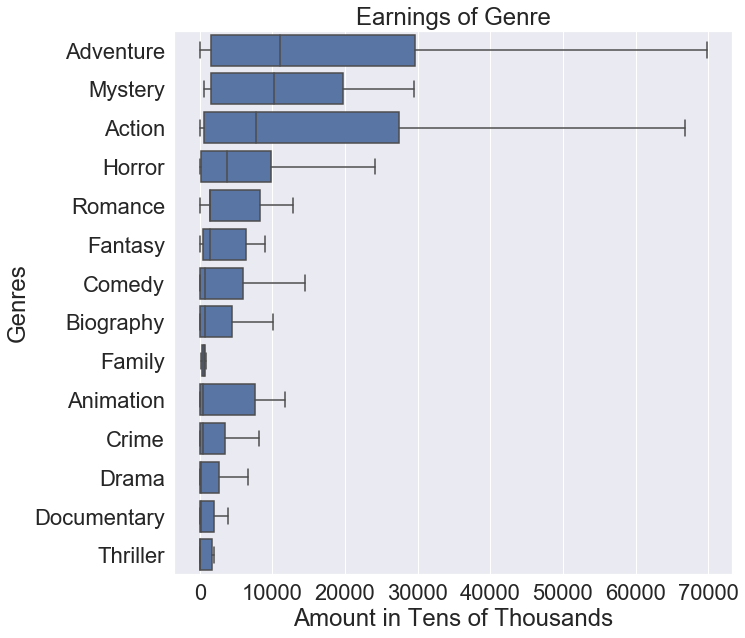

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('bom.movie_gross.csv.gz')
movies = pd.read_csv('imdb.title.basics.csv.gz')
popularity = pd.read_csv('tmdb.movies.csv.gz')

# this is to fill NA values so I can add gross columns together for each movie
values = {'domestic_gross': 0, 'foreign_gross': 0}
df = df.fillna(value=values)

# reassign billion dollar movies to values in billions
df.at[1872, 'foreign_gross'] = 1131600000
df.at[1873, 'foreign_gross'] = 1019400000
df.at[1874, 'foreign_gross'] = 1163000000
df.at[2760, 'foreign_gross'] = 1010000000
df.at[3079, 'foreign_gross'] = 1369500000

# make all foreign_gross values an integer
df['foreign_gross'] = df['foreign_gross'].astype(int)
df['total_gross'] = df['foreign_gross'] + df['domestic_gross']

#drop all columns but title and total_gross and retrieve the first 100 most grossed movies
df = df.drop(['studio', 'domestic_gross', 'foreign_gross', 'year'], axis = 1)

# make all total_gross numbers display without 'e'
# pd.options.display.float_format = "{:.2f}".format

#organize from most profittable to least
df = df.nlargest(4000, columns = 'total_gross')




movies = movies.drop(columns = ['original_title', 'runtime_minutes', 'start_year', 'tconst'])
movies.rename(columns = {'primary_title':'title'}, inplace = True)

# combined tables with 'title', 'total_gross', 'genre_ids', 'popularity'
two_tables = pd.merge(df, movies, on = 'title', how = 'inner')
# drop unnecessary columns
two_tables

# make a dataframe for 'popularity'
popularity = popularity.drop(columns = ['Unnamed: 0','genre_ids','id','original_language','original_title','release_date','vote_average','vote_count'])
popularity

# combine 'two_tables' with 'popularity'
combined_data = pd.merge(two_tables, popularity, on = 'title', how = 'inner')
combined_data

# take out duplicate title, used the last title because it had the highest popularity, the total_gross was the same
combined_data['title'] = combined_data.title.drop_duplicates(keep = 'last')
combined_data = combined_data.dropna(subset = ['title'], axis = 0, how = 'any')
combined_data

# Locate any na values in data
combined_data.isna().any()
combined_data.loc[combined_data['genres'].isnull()]

# alter data in column to appropriate values
combined_data.at[304, 'genres'] = 'Action, Sci-Fi'
combined_data.at[3240, 'genres'] = 'Comedy'
combined_data.at[3093, 'genres'] = 'Drama'
combined_data.at[2618, 'genres'] = 'Drama, Romance'
combined_data.at[2388, 'genres'] = 'Crime, Drama'
combined_data.at[2347, 'genres'] = 'Drama, Thriller'
combined_data.at[2182, 'genres'] = 'Drama, Thriller'
combined_data.at[2049, 'genres'] = 'Drama'
combined_data.at[1797, 'genres'] = 'Animation, Family'
combined_data.at[1411, 'genres'] = 'Drama, Horror'
combined_data.at[1280, 'genres'] = 'Comedy, Romance'
combined_data.at[752, 'genres'] = 'Action, Sci-Fi'
combined_data.at[661, 'genres'] = 'Action, Thriller'
combined_data.at[643, 'genres'] = 'Comedy, Romance'
combined_data.at[553, 'genres'] = 'Thriller, Drama'
combined_data.at[62, 'genres'] = 'Animation, Comedy'

# seperate all genres
u = str(set(list(combined_data['genres'])))
u.count('Adventure')
combined_data["genres"]= combined_data["genres"].str.split(",", n = 1, expand = True)

# some movies are so small it is not worth representing so we'll tak those movie types out
combined_data=combined_data[combined_data.genres != 'History']
combined_data=combined_data[combined_data.genres != 'Sci-Fi']
combined_data=combined_data[combined_data.genres != 'Sport']
combined_data=combined_data[combined_data.genres != 'Western']

# change total_gross values to values in millions and rename it
combined_data['total_gross'] = combined_data['total_gross'].map(lambda x: int(x))
combined_data['total_gross'] = combined_data['total_gross'].map(lambda x: x / 10000)
combined_data=combined_data.rename(columns = {'total_gross': "total_gross_in_ten_thousands's"})


#graph 1
my_order = combined_data.groupby(by=["genres"])["popularity"].median().sort_values(ascending=False).index
plt.figure(figsize = (10,10))
sns.boxplot(x = 'popularity', y ='genres',order = my_order, data = combined_data.nlargest(4000, 'popularity'), color = 'b', showfliers = False)
plt.title("Popularity of Each Genre")
plt.xlabel("Popularity Scores")
plt.ylabel("Genres")

# graph 2
my_order2 = combined_data.groupby(by=["genres"])["total_gross_in_ten_thousands's"].median().sort_values(ascending=False).index
plt.figure(figsize = (10,10))
sns.boxplot(x = "total_gross_in_ten_thousands's", y = 'genres',order = my_order2, data = combined_data.nlargest(4000, "total_gross_in_ten_thousands's"), color = 'b', showfliers=False)
plt.title("Earnings of Genre")
plt.xlabel("Amount in Tens of Thousands")
plt.ylabel("Genres")






# combined_data




In [188]:
combined_data

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.00,Action,80.77
1,Jurassic World,167170.00,Action,20.71
2,Furious 7,151600.00,Action,20.40
3,Avengers: Age of Ultron,140540.00,Action,44.38
5,Black Panther,134700.00,Action,44.14
...,...,...,...,...
3767,Into the White,0.07,Biography,7.07
3768,Death of a Superhero,0.06,Animation,5.16
3769,2:22,0.04,Thriller,11.32
3770,Satanic,0.03,Horror,6.40


In [189]:
combined_data.nlargest(10, 'popularity')

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.00,Action,80.77
876,John Wick,8870.00,Action,78.12
37,The Hobbit: The Battle of the Five Armies,95600.00,Adventure,53.78
83,Guardians of the Galaxy,77340.00,Action,49.61
354,Blade Runner 2049,25930.00,Drama,48.57
111,Fantastic Beasts: The Crimes of Grindelwald,65370.00,Adventure,48.51
154,Ralph Breaks the Internet,52920.00,Adventure,48.06
41,Spider-Man: Homecoming,88020.00,Action,46.77
124,Ant-Man and the Wasp,62260.00,Action,44.73
3,Avengers: Age of Ultron,140540.00,Action,44.38


In [190]:
combined_data.nlargest(10, "total_gross_in_ten_thousands's")

,title,total_gross_in_ten_thousands's,genres,popularity
0,Avengers: Infinity War,204830.00,Action,80.77
1,Jurassic World,167170.00,Action,20.71
2,Furious 7,151600.00,Action,20.40
3,Avengers: Age of Ultron,140540.00,Action,44.38
5,Black Panther,134700.00,Action,44.14
7,Star Wars: The Last Jedi,133260.00,Action,34.29
8,Jurassic World: Fallen Kingdom,130950.00,Action,34.96
14,Frozen,127640.00,Adventure,26.18
15,Incredibles 2,124280.00,Action,36.29
16,The Fate of the Furious,123600.00,Action,28.67
